In [1]:
import pandas as pd   
from pandas import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
sales = pd.read_csv('sales-cars.csv',index_col=0)   ## Loading Dataset 

In [3]:
sales.head()

,Sales
Month,
2016-01,266
2016-02,146
2016-03,183
2016-04,119
2016-05,180


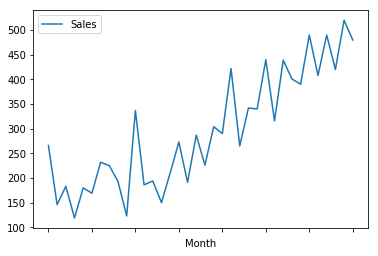

In [4]:
sales.plot()     ## To Check data is stationary or not     

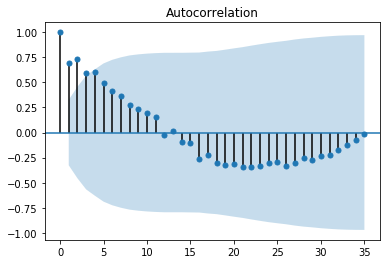

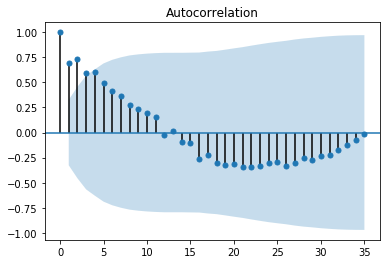

In [5]:
from statsmodels.graphics.tsaplots import plot_acf   ## Ploting autocorrection
plot_acf(sales)


Here Time series is not stationary. We will make it stationary.
For stationary time series data we should make mean , variance and covariance constant over periods

In [6]:
sales.head()  ### Original data 

,Sales
Month,
2016-01,266
2016-02,146
2016-03,183
2016-04,119
2016-05,180


In [7]:
sales.shift(1).head()    ### time lag = 1

,Sales
Month,
2016-01,NaN
2016-02,266.0
2016-03,146.0
2016-04,183.0
2016-05,119.0


In [8]:
sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


,Sales
Month,
2016-01,NaN
2016-02,-120.0
2016-03,37.0
2016-04,-64.0
2016-05,61.0
2016-06,-11.0
2016-07,63.0
2016-08,-7.0
2016-09,-32.0


In [9]:
sales_diff = sales.diff(periods=1)[1:]    ## [1:] will remove row with  NAN 
sales_diff.head(5)

,Sales
Month,
2016-02,-120.0
2016-03,37.0
2016-04,-64.0
2016-05,61.0
2016-06,-11.0


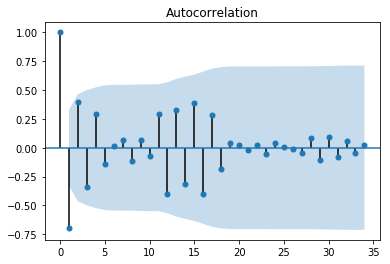

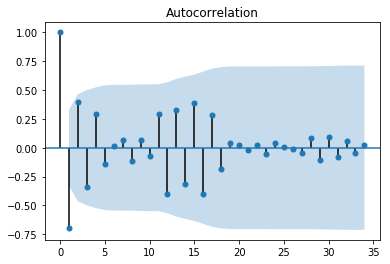

In [10]:
plot_acf(sales_diff)         

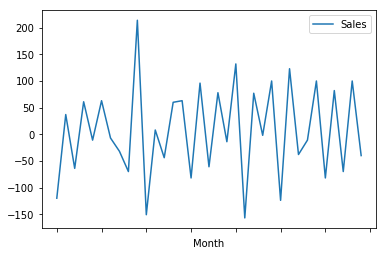

In [11]:
sales_diff.plot()

Now our data is stationary

Spitting our data into train and test 

In [12]:
X = sales.values
train = X[0:27] 
test = X[26:] 
predictions = []

In [13]:
print('X.size ',X.size,'\n' , 'train.size ',train.size,'\n' , 'test.size ',test.size,'\n')

X.size  36 
 train.size  27 
 test.size  10 



ARIMA model

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
#p,d,q  
#p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(3, 2, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

291.275046839692


C:\Users\Jatin\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [16]:
predictions_ARIMA= model_arima_fit.forecast(steps=10)[0]
predictions_ARIMA

array([419.18811169, 434.43956446, 495.92362045, 433.42514009,
       503.18131503, 544.8627431 , 546.60164555, 548.98273742,
       612.29986852, 636.71580252])

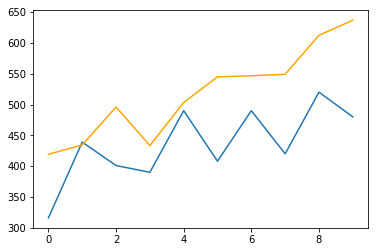

In [17]:
plt.plot(test)
plt.plot(predictions_ARIMA,color='orange')


Finding best paramater for ARIMA

In [18]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [19]:
aic1 = []
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        
        aic1.append( model_arima_fit.aic)
    except:
        continue
    



In [20]:
min(aic1)     ## for 10


291.275046839692

In [21]:
# Here we check min (aic1). and put corresponding param in ARIMA model

In [22]:
import warnings                               ## To find which param is there for min(aic)
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 0, 5) nan
(0, 0, 7) 312.8727661954332
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.16687175343054
(1, 0, 2) 310.97906422264316
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584986
(1, 1, 2) 299.4716667063295
(1, 1, 3) 301.28511809477334
(1, 1, 4) 299.97873239729927
(1, 2, 0) 306.5307767571543
(1, 2, 5) 294.6437482047728
(2, 0, 0) 310.99695736763897
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.99999301674126
(2, 1, 2) 298.55054281302256
(2, 1, 3) 302.87208243829116
(2, 1, 5) 296.364010196169
(2, 2, 0) 306.2975856432374
(2, 2, 5) 312.97553872743504
(3, 0, 0) 312.98385874204837
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.99793534183914
(3, 1, 2) 292.6686238693939
(3, 1, 3) 294.65889075168616
(3, 1, 5) 298.36261650490866
(3, 2, 0) 299.407586815627
(3, 2, 

In [23]:
print("Mean squared error: %.2f\n"
      % mean_squared_error(predictions_ARIMA, test))


Mean squared error: 9338.94



In [24]:
df = pd.DataFrame(test)

df_ARIMA = pd.DataFrame(predictions_ARIMA)


In [25]:

actual_and_predicted = pd.concat([df,df_ARIMA] , axis= 1)
actual_and_predicted.columns = ['Test', 'ARIMA']
actual_and_predicted

,Test,ARIMA
0,316,419.188112
1,439,434.439564
2,401,495.923620
3,390,433.425140
4,490,503.181315
5,408,544.862743
6,490,546.601646
7,420,548.982737
8,520,612.299869
9,480,636.715803


In [26]:

actual_and_predicted['Test - ARIMA'] = abs(actual_and_predicted['Test'] - actual_and_predicted['ARIMA'])

actual_and_predicted

,Test,ARIMA,Test - ARIMA
0,316,419.188112,103.188112
1,439,434.439564,4.560436
2,401,495.923620,94.923620
3,390,433.425140,43.425140
4,490,503.181315,13.181315
5,408,544.862743,136.862743
6,490,546.601646,56.601646
7,420,548.982737,128.982737
8,520,612.299869,92.299869
9,480,636.715803,156.715803
